In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import numdifftools as nd
from numpy import linalg as LA
import random
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'Assignment5Dataset.csv')
# df=df.drop(df.columns[2],axis = 1)
data = df.to_numpy()
import sys
import numpy


In [ ]:

x1 = data[:,0]
x2 = data[:,1]
data.shape[0]

In [ ]:
plt.scatter(x1, x2,s = 1, marker='o');

In [ ]:
def plotmatrix(A,mean,cluster):
    rep = [  [[],[]] for i in range(cluster) ]
    for i in range(A.shape[0]):
        for cl in range(cluster):
            if(A[i][cl]==1):
                rep[cl][0].append(data[i][0])
                rep[cl][1].append(data[i][1])
                break
    colors = {0:"red",1:"blue",2:"silver",3:"gold" ,4:"yellow" , 5:"orange",} 
    
   
    for j in range(cluster):
        plt.scatter(rep[j][0],rep[j][1],s=1,c=colors[j]);
        
    for m in range(cluster):
        plt.scatter(mean[m][0],mean[m][1],s=30,c='black',marker='^')
    plt.show()


In [ ]:
# def plotEasy(A,mean,cluster):
#     y = [ 0 for i in range(A.shape[0])]

#     for i in range(A.shape[0]):
#         for cl in range(cluster):
#             if(A[i][cl]==1):
#                 y[i] = cl
#     colors = {0:"red",1:"blue",2:"silver",3:"gold" ,4:"yellow" , 5:"orange",} 
#     for m in range(cluster):
#         plt.scatter(mean[m][0],mean[m][1],s=30,c='black',marker='^')
#     for i in range(A.shape[0]):
#         plt.scatter(data[i][0],data[i][1],s=1,c=colors[y[i]])
#     plt.show()
        

In [ ]:
def change(A,mean,cluster):
    A = np.zeros((data.shape[0],cluster))
    for i in range(data.shape[0]):
        mindist = math.inf
        ind = 0
        for j in range(cluster):
            dist = LA.norm(data[i]-mean[j])
            if(dist < mindist):
                ind = j
                mindist = dist
        for j in range(cluster):
            if(j==ind):
                A[i][j] = 1
            else:
                A[i][j] = 0

    return A            

In [ ]:
def Kmean(cluster):

    mean = np.zeros((cluster,data.shape[1]))
    for i in range(cluster):
        mean[i] = [random.uniform(-2,2) ,random.uniform(-2,2)]
    A = np.zeros((data.shape[0],cluster))
    A = change(A,mean,cluster)

    itr = 0
    while True:
        itr+=1

        avg_mean = np.zeros((cluster,2))

        cnt = [0]*cluster
        for r in range(data.shape[0]):
            for j in range(cluster):
                if A[r][j]==1:
                    avg_mean[j] += data[r]
                    cnt[j]+=1

        for j in range(cluster):
            avg_mean[j] = avg_mean[j]/cnt[j]

        mean = avg_mean
  
        plotmatrix(A,mean,cluster)
        old_A = A
        A  = change(A,mean,cluster)
        if((old_A==A).all()):
            print(itr)
            break


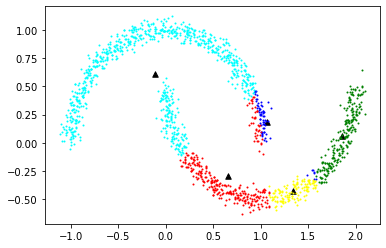

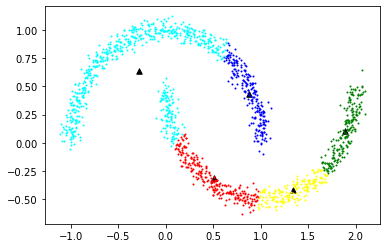

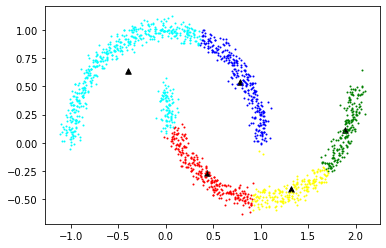

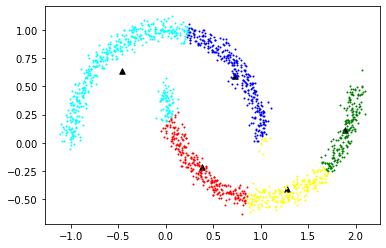

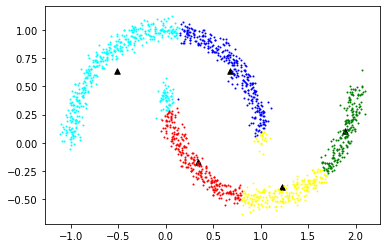

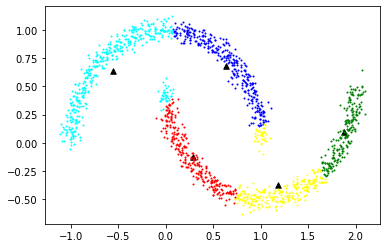

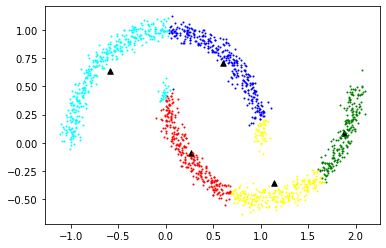

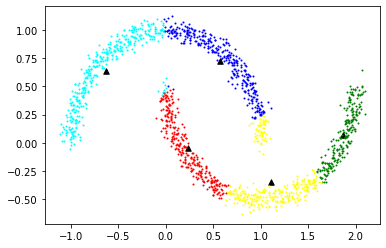

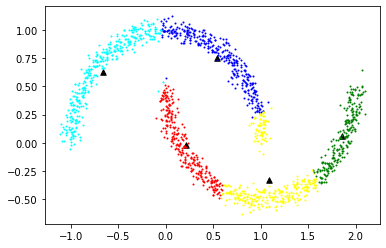

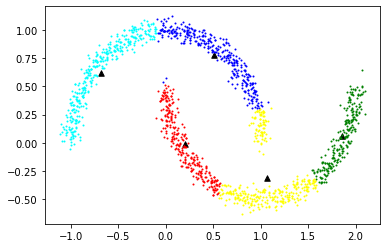

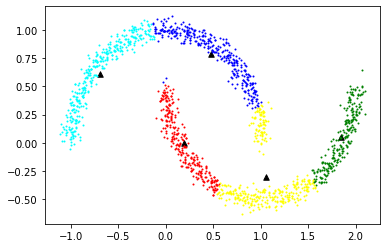

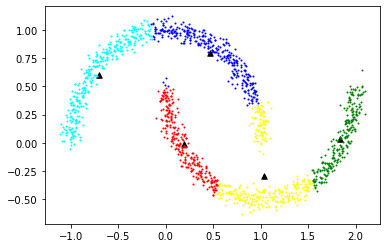

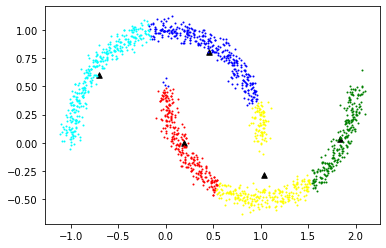

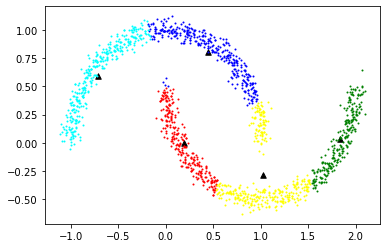

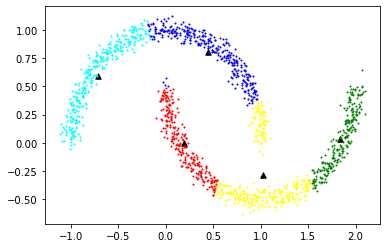

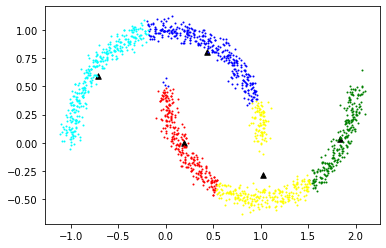

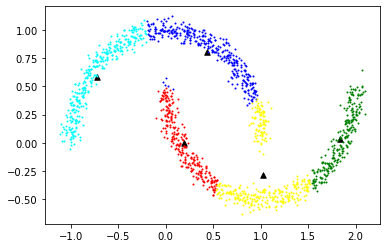

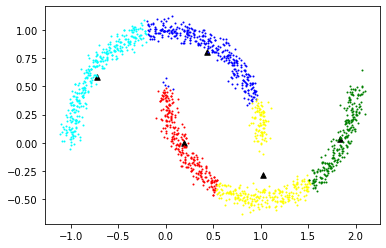

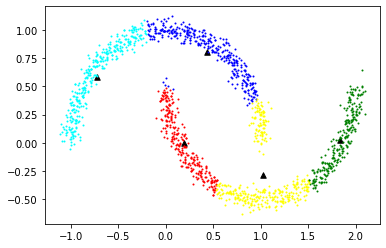

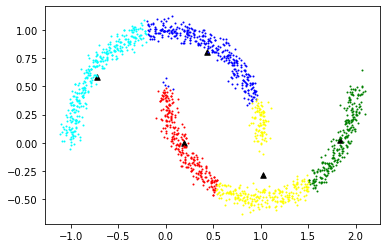

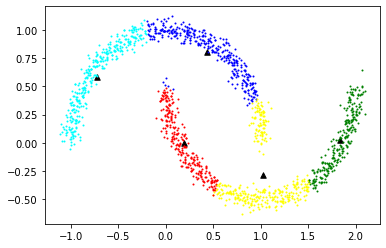

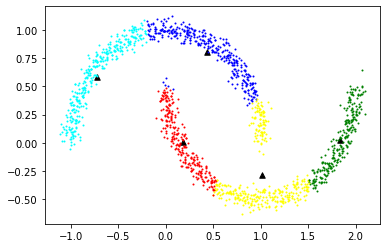

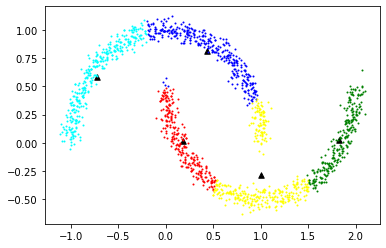

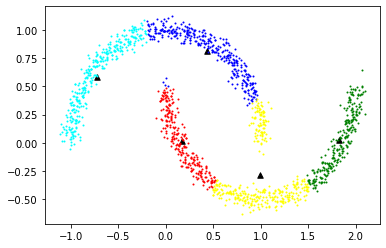

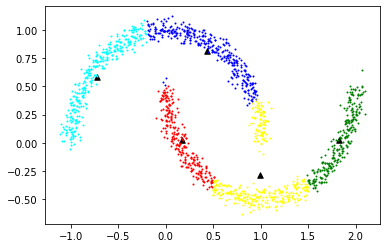

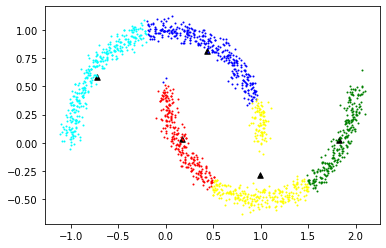

26


In [38]:
Kmean(5)